In [18]:
import pickle as pl
import matplotlib 
import matplotlib
font = {'size'   : 22}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt 
import numpy as np
import os
from scipy.io import savemat

In [2]:
fol = 'output_final/{num}/pos2/many/{types}_{idler}{num}.pickle'

In [3]:
type_vec = ('rin', 'CE', 'P_out')
idler_vec = ('pc', 'bs')
values_len = len(os.listdir('output_final/'))

In [4]:
l_vec, CE_vec = [], []

In [5]:
def get_data(idler = 'pc'):
    CE_vec, P_out_vec, rin_vec = [], [], []
    l_vec_1, l_vec_2, l_vec_3 = [], [], []
    for val, vec, l_vec in zip(type_vec, (CE_vec, P_out_vec, rin_vec), (l_vec_1, l_vec_2, l_vec_3)):
        for i in range(values_len):
            with open(fol.format(num = i, types =val, idler = idler), 'rb') as f:
                D = pl.load(f)
            l_vec.append(D[0])
            vec.append(D[1])
        shape2 = min([len(i) for  i in vec])
        for i in range(values_len):
            vec[i] = vec[i][:shape2]
            l_vec[i] = l_vec[i][:shape2]
        vec, l_vec = np.asarray(vec), np.asarray(l_vec)
    return l_vec_1, l_vec_2, l_vec_3, CE_vec, P_out_vec, rin_vec

In [8]:
z = np.linspace(0,1000,100)
CE_vec = np.asarray(CE_vec)

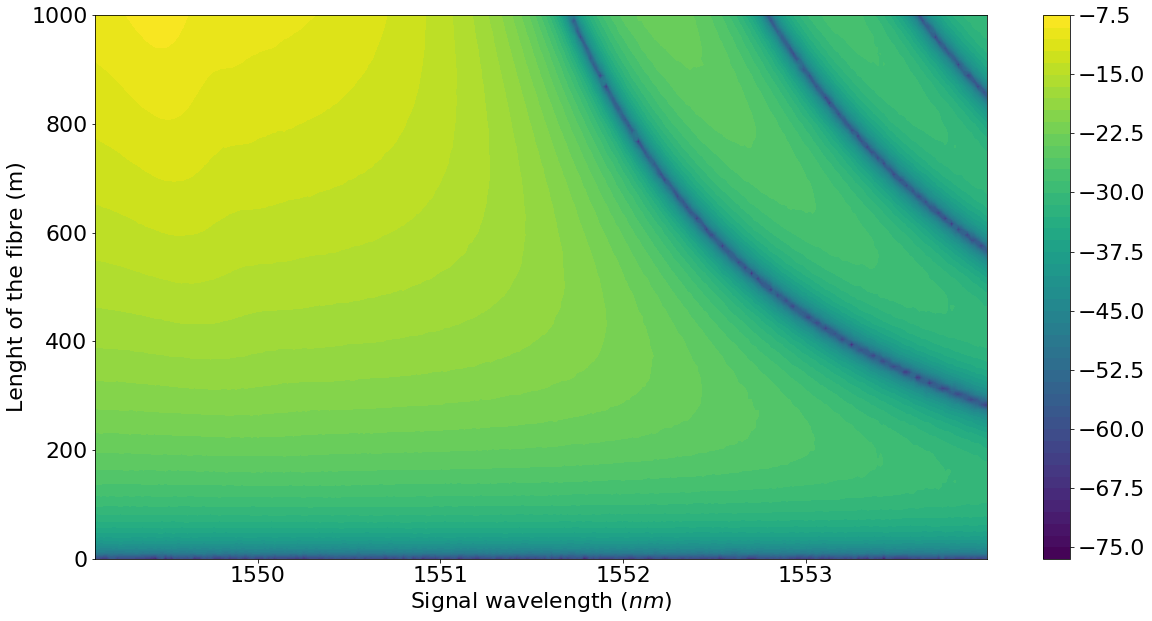

In [21]:
l_vec_1, l_vec_2, l_vec_3, P_out_vec,CE_vec, rin_vec = get_data('bs')
L, TT = np.meshgrid(l_vec_1[0], z)

fig = plt.figure(figsize=(20,10))
plt.contourf(L, TT, CE_vec, 50)
plt.ylabel(r'Lenght of the fibre (m)')
plt.xlabel(r'Signal wavelength ($nm$)')
plt.colorbar()
#plt.title('The length is {}m'.format(1000))
plt.show()
D = {'lambda':L, 'I': TT, 'CE': CE_vec}
with open('CE_vec-bs.pickle', 'wb') as f:
    pl.dump(D, f)
savemat('CE_vec-bs.mat', D)

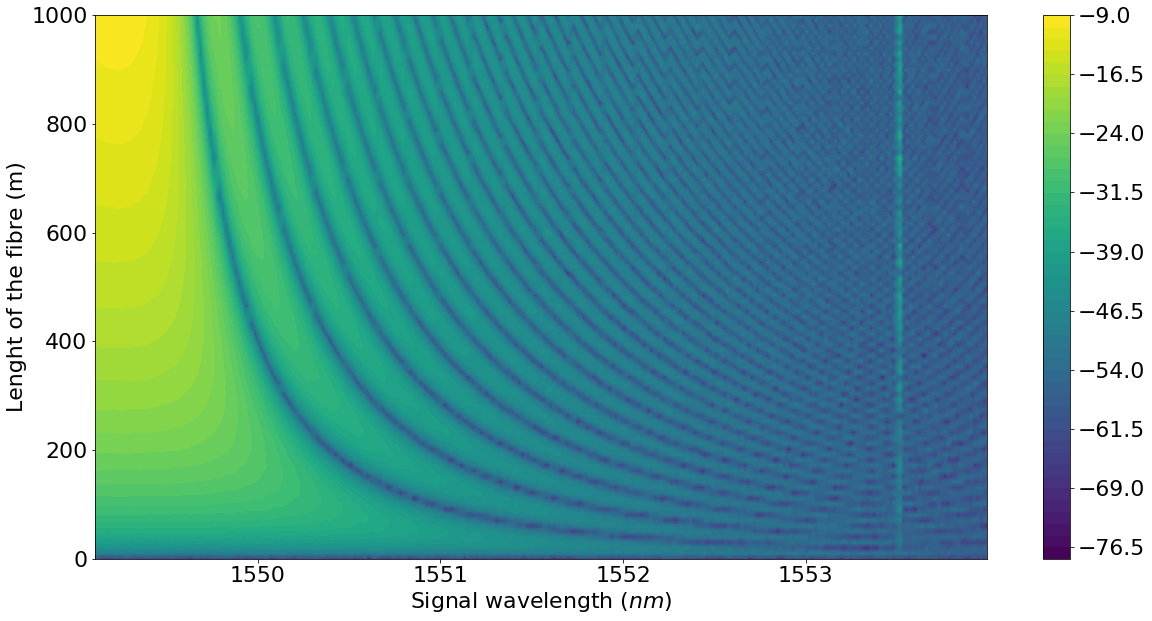

In [22]:
l_vec_1, l_vec_2, l_vec_3, P_out_vec,CE_vec, rin_vec = get_data('pc')
L, TT = np.meshgrid(l_vec_1[0], z)

fig = plt.figure(figsize=(20,10))
plt.contourf(L, TT, CE_vec, 50)
plt.ylabel(r'Lenght of the fibre (m)')
plt.xlabel(r'Signal wavelength ($nm$)')
plt.colorbar()
#plt.title('The length is {}m'.format(1000))
plt.show()
D = {'lambda':L, 'I': TT, 'CE': CE_vec}
with open('CE_vec-pc.pickle', 'wb') as f:
    pl.dump(D, f)
savemat('CE_vec-pc.mat', D)